In [1]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interactive, interactive_output, fixed, IntSlider, FloatSlider
import matplotlib.pyplot as plt




In [2]:
assortment = pd.read_csv('assortment.csv')
tarif = pd.read_csv('tariffs.csv')
sales1 = pd.read_csv('sales_part1.csv')
sales2 = pd.read_csv('sales_part2.csv')
sales = pd.concat([sales1, sales2], ignore_index=True)


display(sales)


,id,quantity,is_corporate
0,1,10,yes
1,2,5,no
2,3,8,no
3,4,2,yes
4,5,1,no


In [3]:
data1 = pd.merge(assortment,tarif , on='id')
data = pd.merge(data1, sales, on='id')

print(data)

   id         name     category  price  discount  quantity is_corporate
0   1      Аспірин  Анальгетики   50.0        10        10          yes
1   2  Парацетамол  Анальгетики   30.0         5         5           no
2   3     Квадевіт     Вітаміни   40.0         0         8           no
3   4  Амоксицилін  Антибіотики  100.0        15         2          yes
4   5  Азитроміцин  Антибіотики  120.0        20         1           no


In [4]:
def for_corporate():
    # Обчислення ціни для корпоративних клієнтів
    data.loc[data['is_corporate'] == 'yes', 'price'] = data['price'] * (1 - data['discount'] * 0.01)
    return data

# Виклик функції та друк результату
print(for_corporate())

   id         name     category  price  discount  quantity is_corporate
0   1      Аспірин  Анальгетики   45.0        10        10          yes
1   2  Парацетамол  Анальгетики   30.0         5         5           no
2   3     Квадевіт     Вітаміни   40.0         0         8           no
3   4  Амоксицилін  Антибіотики   85.0        15         2          yes
4   5  Азитроміцин  Антибіотики  120.0        20         1           no


In [20]:

# Створення віджета Dropdown
wd = widgets.Dropdown(
    options=data['category'].unique(),
    value=data['category'].iloc[0],
    description='Категорії',
    disabled=False
)

# Функція для відображення даних відповідно до вибраної категорії
def show_by_category(value):
    if value in data['category'].values:
        result = data[data['category']==value]
        display(result[['name','price']])

widget= widgets.interactive(show_by_category, value=wd)

display(widget)


interactive(children=(Dropdown(description='Категорії', options=('Анальгетики', 'Вітаміни', 'Антибіотики'), va…

             price  quantity
category                    
Анальгетики   75.0        15
Антибіотики  205.0         3
Вітаміни      40.0         8
      category    summ
0  Анальгетики  1125.0
1  Антибіотики   615.0
2     Вітаміни   320.0


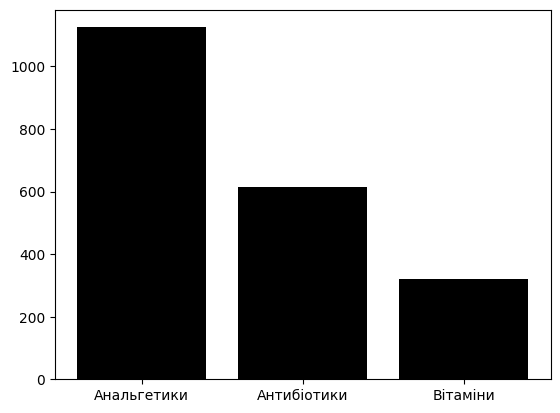

In [6]:
def category_summ():
    filtred = data.groupby('category')[['price', 'quantity']].sum()
    print(filtred)
    filtred['summ'] = filtred['price'] * filtred['quantity']
    filtred = filtred.reset_index()
    print(filtred[['category', 'summ']])

    bar_graph(filtred['summ'], filtred['category'])



def bar_graph(a, b):
    plt.bar(b,a, color='black')
    plt.show()
category_summ()


In [7]:
data['summ'] = data['price'] * data['quantity']

def max_summ_by_category():
    filtred = data[data['is_corporate'] == 'yes']
    
    grouped = filtred.groupby(['category', 'name'])['summ'].sum().reset_index()
    
    grouped = grouped.sort_values(by=['category', 'summ'], ascending=[True, False])
    
    result = grouped.groupby('category').first().reset_index()
    
    print(result[['category', 'name', 'summ']])
max_summ_by_category()

      category         name   summ
0  Анальгетики      Аспірин  450.0
1  Антибіотики  Амоксицилін  170.0


In [8]:
def sales_corporate():
    filtred = data[(data['is_corporate'] == 'yes')]
    grouped = filtred.groupby('category')['summ'].sum().reset_index()
    display(grouped)
sales_corporate()

,category,summ
0,Анальгетики,450.0
1,Антибіотики,170.0


In [9]:
def summary_corporate():
    filtred = data[(data['is_corporate']=='yes')]
    result = filtred['summ'].sum()
    print(f'Сума продажів для корпоративних клієнтів: {result}')
summary_corporate()

Сума продажів для корпоративних клієнтів: 620.0


In [ ]:
filtred = data[(data['is_corporate']=='no')]


wd = widgets.Dropdown(
    options=data['category'].unique(),
    value=data['category'].iloc[0],
    description='Категорії',
    disabled=False
)

def show_by_category(value):
    if value in data['category'].values:
        result = filtred[filtred['category'] == value]
        display(result['name'])

widget= widgets.interactive(show_by_category, value=wd)

display(widget)

interactive(children=(Dropdown(description='Категорії', options=('Анальгетики', 'Вітаміни', 'Антибіотики'), va…

In [11]:
df = pd.read_csv('tariffs.csv')

class Product:
    def __init__(self, id, price, discount):
        self._id = id
        self._price = price
        self._discount = discount

    # Геттер для id
    @property
    def id(self):
        return self._id

    # Сеттер для id
    @id.setter
    def id(self, value):
        self._id = value

    # Геттер для price
    @property
    def price(self):
        return self._price

    # Сеттер для price
    @price.setter
    def price(self, value):
        self._price = value

    # Геттер для discount
    @property
    def discount(self):
        return self._discount

    # Сеттер для discount
    @discount.setter
    def discount(self, value):
        self._discount = value

# Створення списку об'єктів Product із DataFrame
products = [Product(row['id'], row['price'], row['discount']) for _, row in df.iterrows()]

# Перевірка створених об'єктів
for product in products:
    print(f"ID: {product.id}, Price: {product.price}, Discount: {product.discount}")



ID: 1.0, Price: 50.0, Discount: 10.0
ID: 2.0, Price: 30.0, Discount: 5.0
ID: 3.0, Price: 40.0, Discount: 0.0
ID: 4.0, Price: 100.0, Discount: 15.0
ID: 5.0, Price: 120.0, Discount: 20.0


In [12]:
import unittest

class TestProduct(unittest.TestCase):
    def setUp(self):
        # Створення тестового об'єкта Product
        self.product = Product(id=1, price=50.00, discount=10)

    def test_get_id(self):
        self.assertEqual(self.product.id, 1)

    def test_set_id(self):
        self.product.id = 2
        self.assertEqual(self.product.id, 2)

    def test_get_price(self):
        self.assertEqual(self.product.price, 50.00)

    def test_set_price(self):
        self.product.price = 60.00
        self.assertEqual(self.product.price, 60.00)

    def test_get_discount(self):
        self.assertEqual(self.product.discount, 10)

    def test_set_discount(self):
        self.product.discount = 15
        self.assertEqual(self.product.discount, 15)

# Запуск тестів у Jupyter Notebook без завершення роботи ядра
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK
